In [11]:
%pip install seaborn

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../notebooks/raw_data.csv')

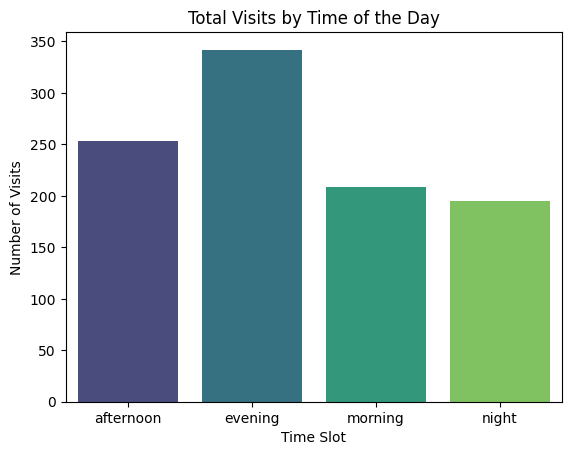

In [20]:
# 1 Peak Shopping Times

# Create Visit_Count column
df['Visit_Count'] = 1

# Group and reset index for plotting
time_visits = df.groupby('Time_of_the Day')['Visit_Count'].sum().reset_index()

# Plot using hue for better compatibility
sns.barplot(data=time_visits, x='Time_of_the Day', y='Visit_Count', hue='Time_of_the Day', palette='viridis', legend=False)

plt.title("Total Visits by Time of the Day")
plt.ylabel("Number of Visits")
plt.xlabel("Time Slot")
plt.show()


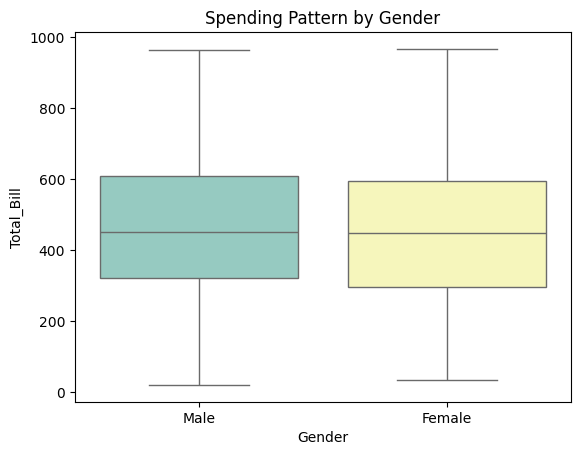

In [22]:
# 2. Gender Spending Behavior

sns.boxplot(data=df, x='Gender', y='Total_Bill', hue='Gender', palette="Set3", dodge=False, legend=False)
plt.title("Spending Pattern by Gender")
plt.legend([],[], frameon=False)  # Hide legend if it's redundant
plt.show()

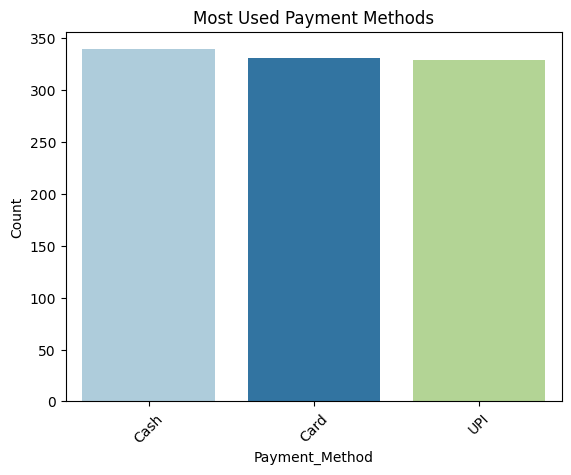

In [25]:
# 3. Preferred Payment Methods
payment_df = payment_counts.reset_index()
payment_df.columns = ['Payment_Method', 'Count']

sns.barplot(data=payment_df, x='Payment_Method', y='Count', hue='Payment_Method', palette="Paired", dodge=False, legend=False)
plt.title("Most Used Payment Methods")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()


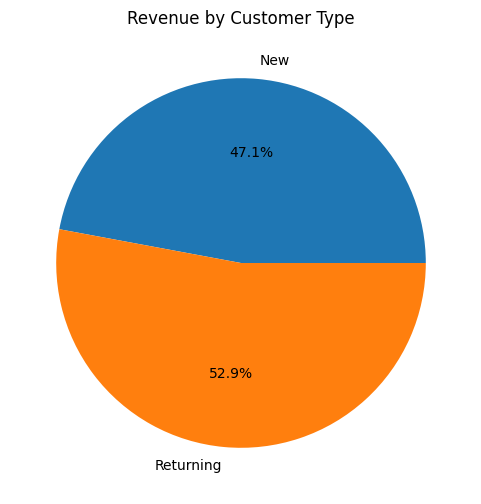

In [27]:
# 4. Returning vs New Customer Revenue Contribution

# Ensure consistency in values
df['Is_Returning_Customer'] = df['Is_Returning_Customer'].str.strip().str.title()

# Group by Yes/No directly
grouped = df.groupby('Is_Returning_Customer')['Total_Bill'].sum()

# Rename index for clarity (optional, in case values are inconsistent)
grouped.index = grouped.index.map({'Yes': 'Returning', 'No': 'New'})

# Plot the pie chart
grouped.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Revenue by Customer Type")
plt.ylabel("")
plt.show()

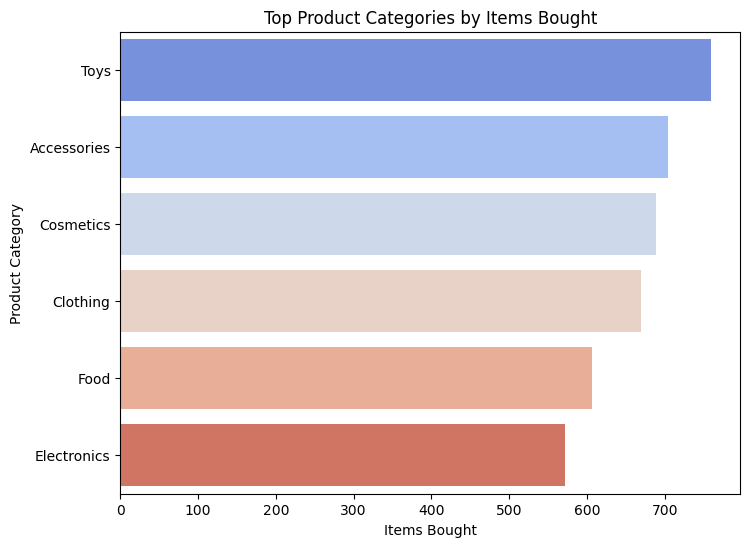

In [29]:
# 5. Top Categories by Items Bought

top_items = df.groupby('Product_Category')['Items_Bought'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=top_items, x='Items_Bought', y='Product_Category', hue='Product_Category', legend=False, palette="coolwarm")
plt.title("Top Product Categories by Items Bought")
plt.xlabel("Items Bought")
plt.ylabel("Product Category")
plt.show()

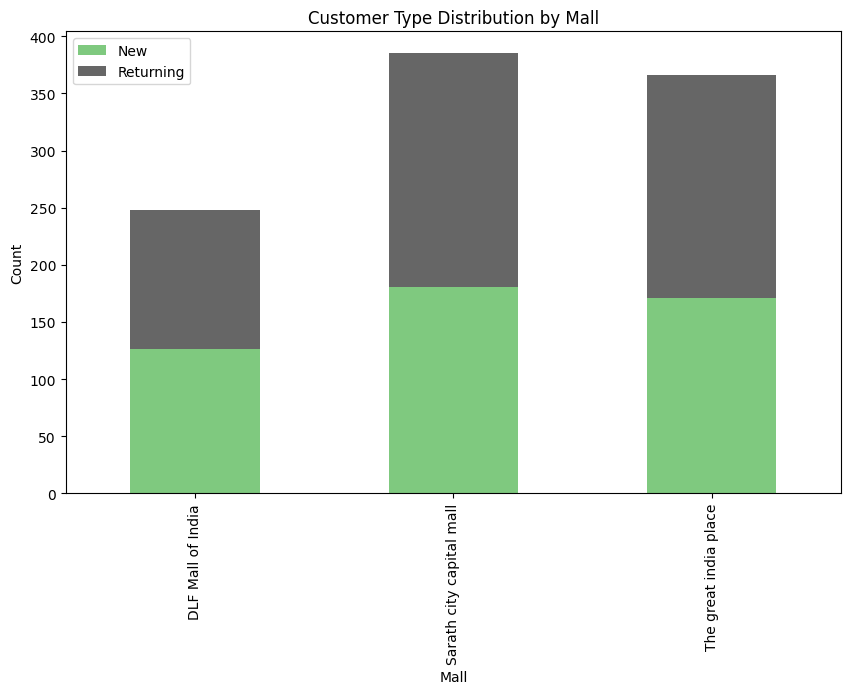

In [30]:
# 6. Customer Type by Mall

customer_mall = df.groupby(['Mall', 'Is_Returning_Customer']).size().unstack().fillna(0)
customer_mall.columns = ['New', 'Returning']
customer_mall.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title("Customer Type Distribution by Mall")
plt.ylabel("Count")
plt.show()

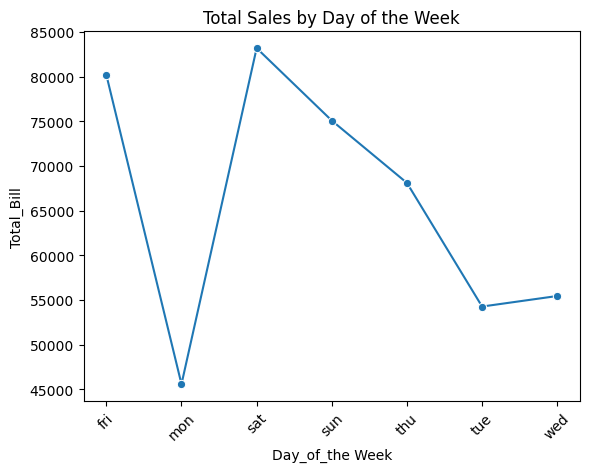

In [31]:
# 7. Day-wise Total Sales

sales_day = df.groupby("Day_of_the Week")["Total_Bill"].sum().reset_index()
sns.lineplot(data=sales_day, x='Day_of_the Week', y='Total_Bill', marker='o')
plt.title("Total Sales by Day of the Week")
plt.xticks(rotation=45)
plt.show()


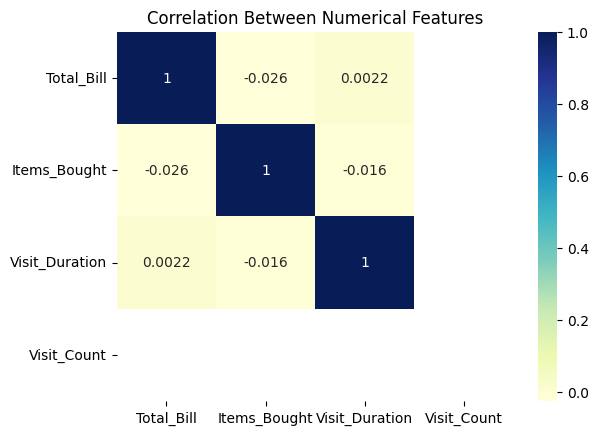

In [32]:
# 8. Correlation Heatmap

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numerical Features")
plt.show()

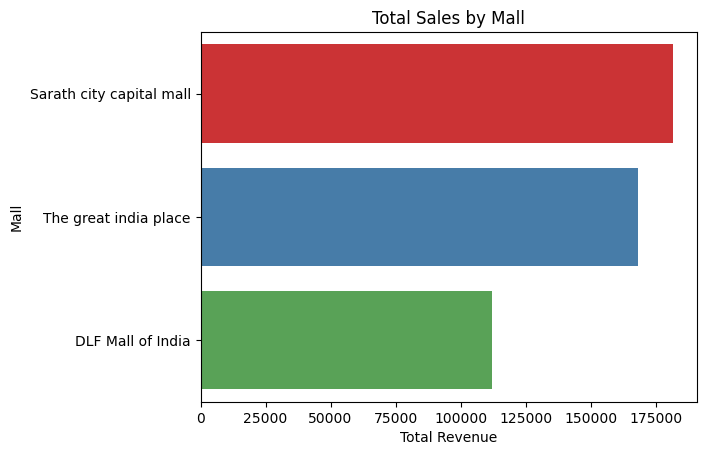

In [33]:
# 9. Top Performing Mall

mall_sales = df.groupby("Mall")["Total_Bill"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=mall_sales, x='Total_Bill', y='Mall', hue='Mall', palette="Set1", legend=False)
plt.title("Total Sales by Mall")
plt.xlabel("Total Revenue")
plt.ylabel("Mall")
plt.show()

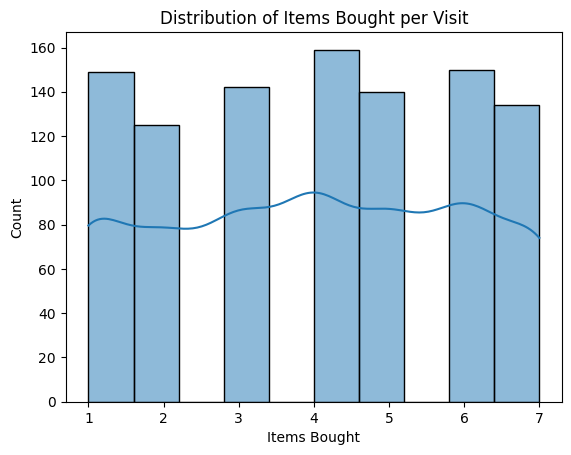

In [34]:
# 10. Items Bought Distribution

sns.histplot(df["Items_Bought"], bins=10, kde=True)
plt.title("Distribution of Items Bought per Visit")
plt.xlabel("Items Bought")
plt.show()